In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

model_data = pd.read_csv("../../przygotowanie_danych/model_data.csv")
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=False)

In [2]:
import optuna
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def objective(trial):
    hidden_layer_sizes = [trial.suggest_int('n_units1', 2, 150),
                          trial.suggest_int('n_units2', 1, 150)]
    activation = trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
    alpha = trial.suggest_float('alpha', 1e-5, 0.5,log=True)

    model = MLPRegressor(max_iter=10000,hidden_layer_sizes=hidden_layer_sizes, activation=activation, alpha=alpha, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    

    return r2

study = optuna.create_study(direction='maximize')
improvement_threshold = 0.001
stale_count = 0

best_r2 = -float('inf')

r2_values = []

for _ in range(11000):
    study.optimize(objective, n_trials=1)

    if study.best_value > best_r2:
        best_r2 = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    r2_values.append(best_r2)

    if stale_count >= 400 or best_r2 >= 1.0:
        break

best_params = study.best_params
best_r2 = study.best_value

print("Najlepsze parametry:", best_params)
print("Najlepszy R^2 Score:", best_r2)


[I 2023-11-11 14:03:55,470] A new study created in memory with name: no-name-3c6d8828-d5e0-48a5-86eb-5ae723e313ce
[I 2023-11-11 14:03:56,985] Trial 0 finished with value: -0.5234324579511183 and parameters: {'n_units1': 22, 'n_units2': 102, 'activation': 'identity', 'alpha': 0.01155033742793244}. Best is trial 0 with value: -0.5234324579511183.
[I 2023-11-11 14:03:58,452] Trial 1 finished with value: -1.0989701625717183 and parameters: {'n_units1': 15, 'n_units2': 76, 'activation': 'identity', 'alpha': 0.0507685473119466}. Best is trial 0 with value: -0.5234324579511183.
[I 2023-11-11 14:03:59,780] Trial 2 finished with value: -0.5382504555768401 and parameters: {'n_units1': 29, 'n_units2': 50, 'activation': 'identity', 'alpha': 0.009043205535897329}. Best is trial 0 with value: -0.5234324579511183.
[I 2023-11-11 14:04:02,852] Trial 3 finished with value: -1.509329909865095 and parameters: {'n_units1': 133, 'n_units2': 88, 'activation': 'relu', 'alpha': 0.12365483345230974}. Best is tr

Najlepsze parametry: {'n_units1': 84, 'n_units2': 145, 'activation': 'relu', 'alpha': 2.3501645376736316e-05}
Najlepszy R^2 Score: -0.15185905272485933


In [2]:
import optuna
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def objective(trial):
    hidden_layer_sizes = [trial.suggest_int('n_units1', 2, 150),
                          trial.suggest_int('n_units2', 1, 150)]
    activation = trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
    alpha = trial.suggest_float('alpha', 1e-5, 0.5, log=True)

    model = MLPRegressor(max_iter=10000, hidden_layer_sizes=hidden_layer_sizes, activation=activation, alpha=alpha, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    return mse

study = optuna.create_study(direction='minimize')  # Change direction to minimize for MSE
improvement_threshold = 0.001
stale_count = 0

best_mse = float('inf')

mse_values = []

for _ in range(11000):
    study.optimize(objective, n_trials=1)

    if study.best_value < best_mse:
        best_mse = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    mse_values.append(best_mse)

    if stale_count >= 400 or best_mse <= improvement_threshold:  # Adjust the condition for MSE
        break

best_params = study.best_params
best_mse = study.best_value

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_mse)


[I 2023-11-11 18:29:21,790] A new study created in memory with name: no-name-efb5af81-f4fc-47a7-8431-142551f9006d
[I 2023-11-11 18:29:25,047] Trial 0 finished with value: 310.40409733057294 and parameters: {'n_units1': 119, 'n_units2': 116, 'activation': 'relu', 'alpha': 0.19025477514670092}. Best is trial 0 with value: 310.40409733057294.
[I 2023-11-11 18:29:54,352] Trial 1 finished with value: 298.43718810535944 and parameters: {'n_units1': 110, 'n_units2': 19, 'activation': 'logistic', 'alpha': 3.0853040526970984e-05}. Best is trial 1 with value: 298.43718810535944.
[I 2023-11-11 18:30:09,693] Trial 2 finished with value: 283.6213377385626 and parameters: {'n_units1': 84, 'n_units2': 77, 'activation': 'logistic', 'alpha': 2.919573563636458e-05}. Best is trial 2 with value: 283.6213377385626.
[I 2023-11-11 18:30:14,806] Trial 3 finished with value: 269.03103727939146 and parameters: {'n_units1': 39, 'n_units2': 137, 'activation': 'tanh', 'alpha': 0.031581914467854307}. Best is trial 

Średni błąd kwadratowy (MSE): 187.26993184664934
Procentowa zgodność: -15.19%


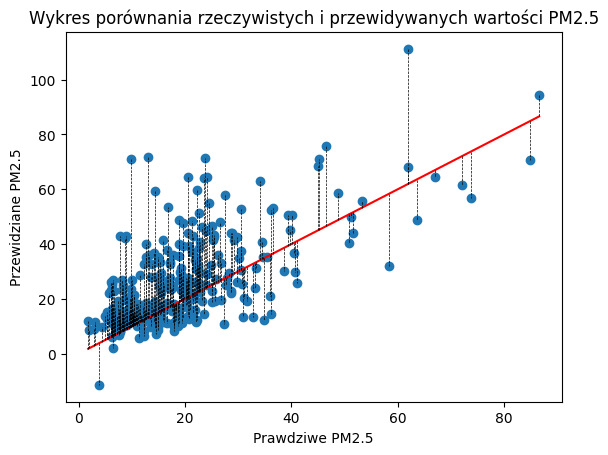

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
0,10.46,13.866133,-3.406133
1,10.38,15.032383,-4.652383
2,10.29,14.549112,-4.259112
3,6.89,14.132755,-7.242755
4,7.56,16.445645,-8.885645
...,...,...,...
344,9.90,15.961533,-6.061533
345,8.40,12.372216,-3.972216
346,10.20,13.929256,-3.729256
347,8.40,12.999008,-4.599008


In [6]:
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

{'n_units1': 84, 'n_units2': 145, 'activation': 'relu', 'alpha': 2.3501645376736316e-05}



model = MLPRegressor(max_iter=10000,hidden_layer_sizes=[84,145],activation='relu',alpha=2.3501645376736316e-05,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

y_test = y_test.reset_index(drop=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='y=x')
plt.scatter(y_test, y_pred)
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], 'k--', lw=0.5)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results
